In [33]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [35]:
# Load dataset
url = '/content/heart_disease_uci.csv'
df = pd.read_csv(url)

# Display basic info about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina    

In [40]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, we can handle them by filling with the mean/median or dropping them
# For simplicity, let's drop rows with missing values
df = df.dropna()

# We can check the data types of each column
print(df.dtypes)

# 'sex' and 'cp' columns are not present in this dataset, so no need for mapping 'sex' and 'cp'
# Check for the categorical columns and encode them if necessary
# Let's assume 'fbs_True', 'restecg_normal', 'exang_True', etc. are categorical features

# Convert categorical columns to numerical using get_dummies
df = pd.get_dummies(df, drop_first=True)

# Check the data after transformation
print(df.head())

# The target column is likely 'num'
# Splitting the data into features (X) and target (y)
X = df.drop('num', axis=1)  # Assuming 'num' is the column with heart disease diagnosis
y = df['num']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


id                          0
age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
ca                          0
num                         0
dataset_Hungary             0
dataset_VA Long Beach       0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64
id                            int64
age                           int64
trestbps                    float64
chol                        float64
thalch                      float64
oldpeak                     float64
ca                          float64
num                           int64
dataset_Hungary                bool
dataset_VA Long Beach          bool
fbs_True                       bool
restecg_normal                 bool
restecg_st-t ab

In [41]:
# evalutaion
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicting on the test data using the trained Logistic Regression model
y_pred = logreg.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print('Classification Report:')
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 60.00%
Confusion Matrix:
[[46  1  1  0  1]
 [10  4  3  3  0]
 [ 1  1  2  2  2]
 [ 2  2  2  2  2]
 [ 1  0  1  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84        49
           1       0.50      0.20      0.29        20
           2       0.22      0.25      0.24         8
           3       0.25      0.20      0.22        10
           4       0.00      0.00      0.00         3

    accuracy                           0.60        90
   macro avg       0.35      0.32      0.32        90
weighted avg       0.58      0.60      0.57        90



In [42]:
# train random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Confusion Matrix
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 58.89%
Random Forest Confusion Matrix:
[[48  0  1  0  0]
 [14  0  3  3  0]
 [ 2  1  2  3  0]
 [ 6  1  0  3  0]
 [ 0  1  2  0  0]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81        49
           1       0.00      0.00      0.00        20
           2       0.25      0.25      0.25         8
           3       0.33      0.30      0.32        10
           4       0.00      0.00      0.00         3

    accuracy                           0.59        90
   macro avg       0.25      0.31      0.27        90
weighted avg       0.43      0.59      0.50        90



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
#Cross-Validation for Random Forest and Logistic Regression
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores_logreg = cross_val_score(logreg, X, y, cv=5)  # 5-fold cross-validation
print(f'Logistic Regression Cross-validation scores: {cv_scores_logreg}')
print(f'Logistic Regression Mean CV score: {cv_scores_logreg.mean():.2f}')

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
print(f'Random Forest Cross-validation scores: {cv_scores_rf}')
print(f'Random Forest Mean CV score: {cv_scores_rf.mean():.2f}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-validation scores: [0.53333333 0.56666667 0.56666667 0.58333333 0.52542373]
Logistic Regression Mean CV score: 0.56
Random Forest Cross-validation scores: [0.58333333 0.56666667 0.5        0.53333333 0.57627119]
Random Forest Mean CV score: 0.55


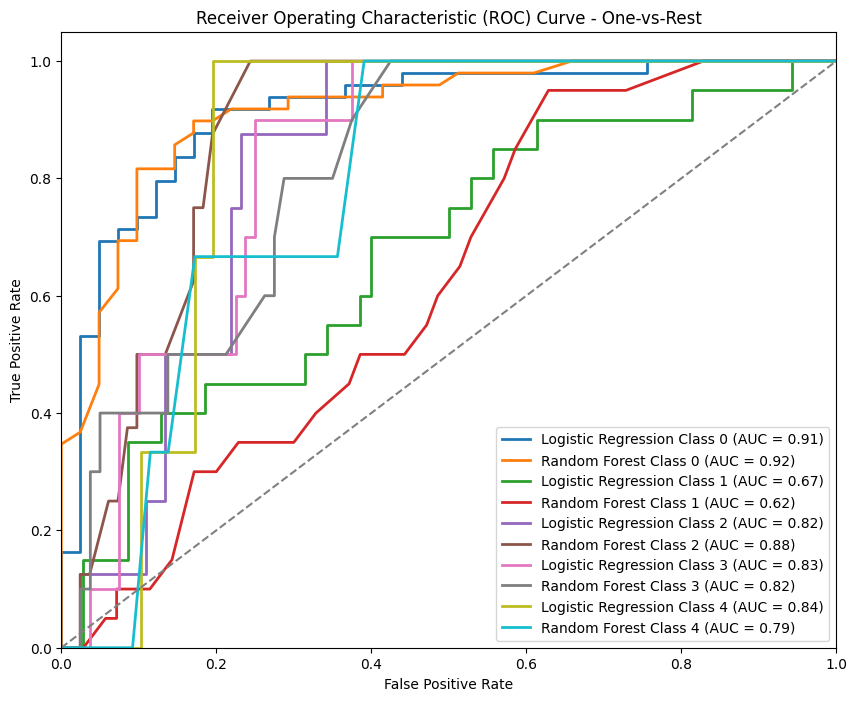

In [48]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the target values
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Binarize the true labels
y_pred_logreg_bin = logreg.predict_proba(X_test_scaled)  # Get probabilities from the logistic regression model
y_pred_rf_bin = rf.predict_proba(X_test_scaled)  # Get probabilities from the random forest model

# Plot the ROC curve for each class (One-vs-Rest approach)
plt.figure(figsize=(10, 8))

# Loop through all classes
for i in range(y_test_bin.shape[1]):
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bin[:, i], y_pred_logreg_bin[:, i])
    roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], y_pred_rf_bin[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    # Plot each class' ROC curve
    plt.plot(fpr_logreg, tpr_logreg, lw=2, label=f'Logistic Regression Class {i} (AUC = {roc_auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest Class {i} (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.show()


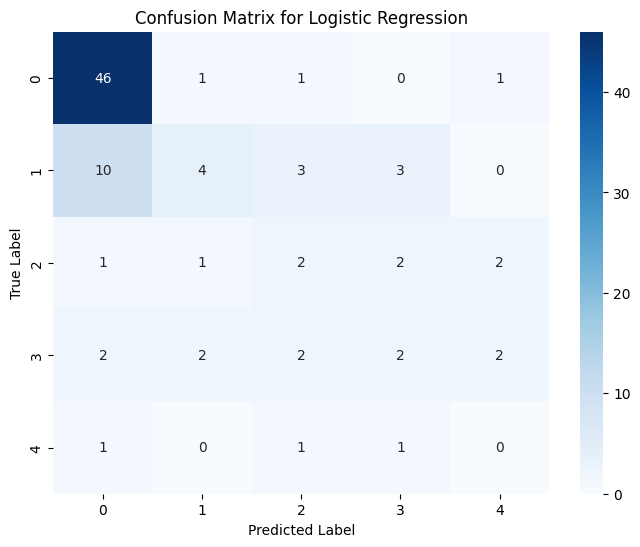

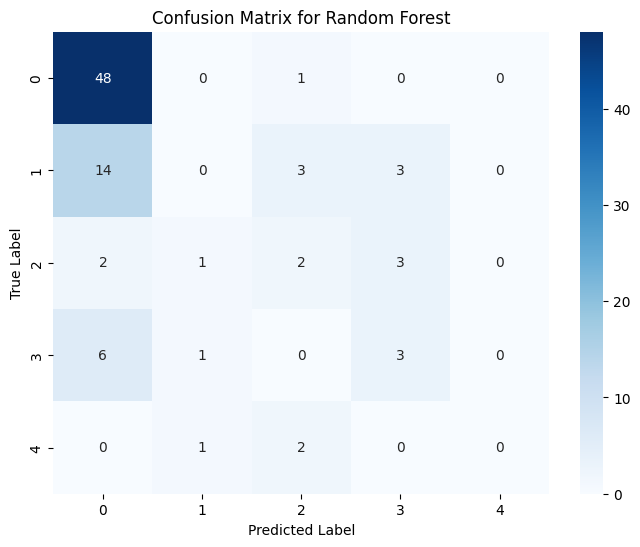

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [50]:
# classification report

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84        49
           1       0.50      0.20      0.29        20
           2       0.22      0.25      0.24         8
           3       0.25      0.20      0.22        10
           4       0.00      0.00      0.00         3

    accuracy                           0.60        90
   macro avg       0.35      0.32      0.32        90
weighted avg       0.58      0.60      0.57        90

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81        49
           1       0.00      0.00      0.00        20
           2       0.25      0.25      0.25         8
           3       0.33      0.30      0.32        10
           4       0.00      0.00      0.00         3

    accuracy                           0.59        90
   macro avg       0.25      0.31      0.27

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# hyperparamter tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create Random Forest model
rf_grid = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [52]:
# model deployment
import joblib

# Save the trained model
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')

# Load the model when deploying
model = joblib.load('logistic_regression_model.pkl')
